In [1]:
#case study Thurstan Green

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime



def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

sns.set()


wd = 'X:/Job Applications/2004o2casestudy/'

In [2]:
DF = pd.read_csv(wd + 'data_presentation_exercise.txt'
                     ,sep='\t'
                     ,parse_dates=['delivery_timestamp']
                     )

In [3]:
DF['Time'] = [datetime.datetime.time(d) for d in DF['delivery_timestamp']] 
DF['Hour'] =DF['delivery_timestamp'].dt.hour
DF['Hour String'] =DF['delivery_timestamp'].dt.hour.astype(str)
DF['Dayofweek'] = DF['delivery_timestamp'].dt.weekday



In [4]:
DF['Delivery Saver'] = np.where((DF['delivery_saver']==1),'Delivery Saver','Not Delivery Saver') 

display(DF.groupby(['delivery_saver','Delivery Saver']).size())

delivery_saver  Delivery Saver    
0               Not Delivery Saver    7495
1               Delivery Saver        3239
dtype: int64

In [5]:
DF.head()

,customer_number,delivery_timestamp,Year_week_number,region_code,delivery_saver,sales_value,items,Time,Hour,Hour String,Dayofweek,Delivery Saver
0,42097,2018-10-17 11:00:00,201834,3,1,75.31,53,11:00:00,11,11,2,Delivery Saver
1,156156,2018-10-24 20:00:00,201835,8,0,121.65,69,20:00:00,20,20,2,Not Delivery Saver
2,82191,2018-05-10 16:00:00,201832,9,0,39.82,23,16:00:00,16,16,3,Not Delivery Saver
3,42607,2018-08-30 09:00:00,201827,3,0,97.60,67,09:00:00,9,9,3,Not Delivery Saver
4,67506,2018-09-23 19:00:00,201831,3,0,79.78,42,19:00:00,19,19,6,Not Delivery Saver


In [6]:
display(DF.columns)
display(DF.shape)

Index(['customer_number', 'delivery_timestamp', 'Year_week_number',
       'region_code', 'delivery_saver', 'sales_value', 'items', 'Time', 'Hour',
       'Hour String', 'Dayofweek', 'Delivery Saver'],
      dtype='object')

(10734, 12)

In [7]:
display(DF.dtypes)

customer_number                int64
delivery_timestamp    datetime64[ns]
Year_week_number               int64
region_code                    int64
delivery_saver                 int64
sales_value                  float64
items                          int64
Time                          object
Hour                           int64
Hour String                   object
Dayofweek                      int64
Delivery Saver                object
dtype: object

In [8]:
#clean any missing values as python don't calculate nulls
for y in DF.columns:
    if(DF[y].dtype == np.float64 or DF[y].dtype == np.int64):
          DF[y] = DF[y].fillna(0)
    else:
           DF[y] = DF[y].fillna('Missing')    
    

In [9]:
#check the regions
checkregion = pd.pivot_table(data= DF
              ,values=['sales_value']
              ,index=['Year_week_number']
              ,columns=['region_code']
              ,aggfunc=np.count_nonzero
              ,fill_value=0)

checkregion.columns = checkregion.columns.droplevel(0)


display(checkregion)
display("week 32 has got no data in reigion 4,5,6")
display("there are a huge number of records in region 10 ")

del checkregion

region_code,1,2,3,4,5,6,7,8,9,10,11
Year_week_number,,,,,,,,,,,
201827,59,39,49,59,64,65,39,52,99,280,30
201828,56,38,54,68,66,56,37,64,100,346,25
201829,55,35,57,63,57,66,39,69,83,326,24
201830,59,41,70,69,56,65,41,63,92,321,27
201831,57,47,58,74,58,72,41,57,89,373,24
201832,57,39,68,0,0,0,42,75,99,346,30
201833,62,32,60,68,49,62,42,64,113,320,34
201834,58,29,62,75,44,61,41,62,94,323,20
201835,51,34,58,62,51,62,43,65,97,331,24


'week 32 has got no data in reigion 4,5,6'

'there are a huge number of records in region 10 '

In [10]:
#check the regions
checkregion = pd.pivot_table(data= DF
              ,values=['items']
              ,index=['Year_week_number']
              ,columns=['region_code']
              ,aggfunc=np.count_nonzero
              ,fill_value=0)

checkregion.columns = checkregion.columns.droplevel(0)


display(checkregion)

del checkregion
#no items in week 32 either, so both items and value have been removed

region_code,1,2,3,4,5,6,7,8,9,10,11
Year_week_number,,,,,,,,,,,
201827,59,39,49,59,64,65,39,52,99,280,30
201828,56,38,54,68,66,56,37,64,100,346,25
201829,55,35,57,63,57,66,39,69,83,326,24
201830,59,41,70,69,56,65,41,63,92,321,27
201831,57,47,58,74,58,72,41,57,89,373,24
201832,57,39,68,0,0,0,42,75,99,346,30
201833,62,32,60,68,49,62,42,64,113,320,34
201834,58,29,62,75,44,61,41,62,94,323,20
201835,51,34,58,62,51,62,43,65,97,331,24


In [11]:
#check shape of number of items orders
a = pd.DataFrame(DF.groupby(['items']).size())

a.rename(columns={0:'Freq'}, inplace=True) #both rows and cols


# ax = a.plot(legend=False)
# ax.set_ylabel('Orders')            
# ax.grid(False)

# plt.title('2018 Q3 Items Distribution', weight='bold',  fontsize=12)

# plt.savefig(wd + 'itemsvscheckout.png',bbox_inches='tight')


del a


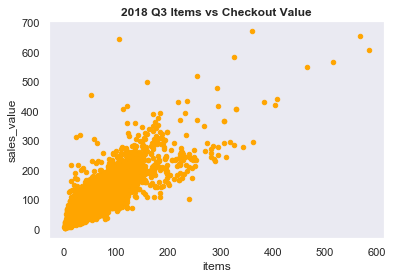

In [12]:
#check shape of number of items orders

ax = DF.plot.scatter(x='items',y='sales_value',c='orange')

plt.title('2018 Q3 Items vs Checkout Value', weight='bold',  fontsize=12)
ax.grid(False)

plt.savefig(wd + 'itemsvscheckoutval.png',bbox_inches='tight')


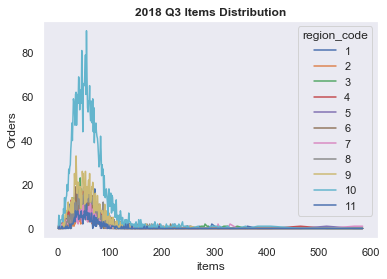

In [13]:
#check shape of number of items orders
a = pd.pivot_table(data=DF
                     ,values = ['customer_number']
                     ,index = ['items']
                     ,columns = ['region_code']
                     ,aggfunc=np.count_nonzero 
                     ,fill_value = 0)    

a.columns = a.columns.droplevel(0)



#display(a)

ax = a.plot()
ax.set_ylabel('Orders')            
ax.grid(False)

plt.title('2018 Q3 Items Distribution', weight='bold',  fontsize=12)

plt.savefig(wd + 'itemsvscheckout.png',bbox_inches='tight')




del a,ax

#shape is similar for all regions 

,sales_value,sales_cuml,sales_cuml_perc
items,,,
155,1697.72,946467.26,0.951
156,673.75,947141.01,0.952
157,827.80,947968.81,0.952
158,325.01,948293.82,0.953
159,1201.08,949494.90,0.954
...,...,...,...
408,442.71,992863.05,0.998
465,548.65,993411.70,0.998
515,566.01,993977.71,0.999


,sales_value,sales_cuml,sales_cuml_perc
items,,,
282,530.63,984878.27,0.990
286,283.54,985161.81,0.990
288,239.35,985401.16,0.990
289,232.33,985633.49,0.990
293,478.19,986111.68,0.991
295,947.85,987059.53,0.992
306,293.22,987352.75,0.992
307,737.16,988089.91,0.993
310,246.08,988335.99,0.993


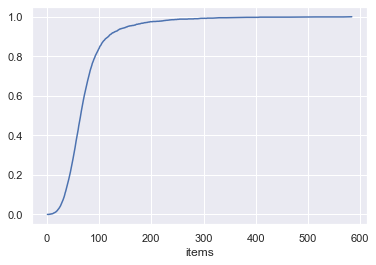

In [14]:
#check cumlative percentage of orders 

a = pd.DataFrame(DF.groupby(['items'])['sales_value'].sum())


a['sales_cuml'] = a['sales_value'].cumsum()    
a['sales_cuml_perc'] = round(a['sales_value'].cumsum()/a['sales_value'].sum(),3)    

a['sales_cuml_perc'].plot(legend=False)

display(a[a['sales_cuml_perc']>=0.95])
display(a[a['sales_cuml_perc']>=0.99])
#the above display the 95 and 99 percentile 
del a

In [15]:
#check the customers
checkcust1 = pd.pivot_table(data= DF
              ,values=['customer_number']
              ,index=['Year_week_number']
              ,columns=['region_code']
              ,aggfunc=np.count_nonzero
              ,fill_value=0)

#display(checkcust1)
#del checkcust

checkcust2 = pd.pivot_table(data= DF
              ,values=['customer_number']
              ,index=['Year_week_number']
              ,columns=['region_code']
              ,aggfunc=pd.Series.nunique
              ,fill_value=0)
#display(checkcust2)
#del checkcust

#ratio or order per customer
checkcust3 = round(checkcust1/checkcust2,1)
display(checkcust3)

del checkcust1,checkcust2,checkcust3

#display("totals are high as well")

customer_number                                               \
region_code                   1    2    3    4    5    6    7    8    9    10   
Year_week_number                                                                
201827                       1.1  1.2  1.1  1.0  1.0  1.1  1.1  1.0  1.1  1.1   
201828                       1.1  1.0  1.0  1.0  1.1  1.1  1.1  1.0  1.1  1.1   
201829                       1.0  1.1  1.0  1.0  1.1  1.1  1.0  1.1  1.1  1.0   
201830                       1.1  1.1  1.0  1.1  1.1  1.1  1.1  1.0  1.0  1.1   
201831                       1.0  1.0  1.0  1.1  1.1  1.1  1.0  1.0  1.1  1.1   
201832                       1.0  1.1  1.0  NaN  NaN  NaN  1.0  1.0  1.1  1.1   
201833                       1.1  1.0  1.0  1.0  1.1  1.1  1.1  1.0  1.1  1.1   
201834                       1.1  1.2  1.1  1.1  1.0  1.1  1.1  1.0  1.0  1.0   
201835                       1.1  1.1  1.0  1.1  1.1  1.1  1.0  1.1  1.0  1.1   
201836                       1.0  1.0  1.1  1.0  1.1  1.1  1.1  1.0  1.1  1.1   
201838                       1.0  1.0  1.0  1.1  1.1  1.1  1.0  1.1  1.1  1.1   
201839                       1.1  1.0  1.1  1.1  1.1  1.1  1.0  1.0  1.1  1.1   

                       
region_code        11  
Year_week_number       
201827            1.0  
201828            1.0  
201829            1.0  
201830            1.0  
201831            1.0  
201832            1.0  
201833            1.1  
201834            1.0  
201835            1.0  
201836            1.0  
201838            1.0  
201839            1.0

In [16]:
# #2.	Calculate and present the following metrics:
# a.	Total sales by week to customers in the sample
# b.	Total customers who placed an order during the quarter
# c.	Average order value
# d.	Average items per order


,sales_value
Year_week_number,
201827,78211.40
201828,83461.91
201829,83860.19
201830,81994.15
201831,89772.85
201832,70099.24
201833,83145.91
201834,77784.74
201835,80034.18


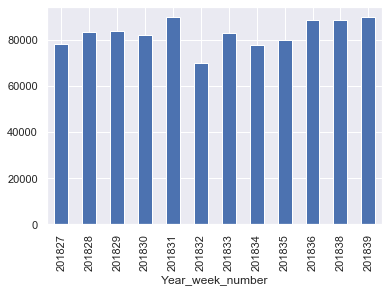

In [17]:
#total sales  by week

totsales=  pd.DataFrame(DF.groupby(['Year_week_number'])['sales_value'].sum())

#a.rename(columns={0:'Freq'}, inplace=True) #both rows and cols


totsales.plot.bar(legend=False)

display(totsales)


del totsales

region_code,1,2,3,7,8,9,10,11,Total
Year_week_number,,,,,,,,,
201827,5454.66,3450.90,4296.15,3735.06,4970.32,9387.10,27506.26,2324.27,61124.72
201828,4852.45,3119.03,4957.03,3400.76,5849.79,8516.87,33174.44,2112.21,65982.58
201829,4762.89,2968.69,4616.97,3635.46,6786.11,8494.37,33475.97,2000.66,66741.12
201830,5087.84,3766.01,6078.68,3640.70,5887.05,8524.63,30206.60,2304.17,65495.68
201831,5696.80,4494.19,4578.29,4507.80,5728.24,7673.07,36448.17,2114.29,71240.85
201832,5506.36,3509.70,6091.26,4238.03,6755.31,8277.29,32889.96,2831.33,70099.24
201833,5009.98,2895.69,5019.56,4900.32,6524.89,9891.96,30675.54,2780.58,67698.52
201834,4914.99,2594.03,5092.02,4316.32,5674.06,8176.02,29937.19,1461.07,62165.70
201835,4690.15,3357.34,4813.70,4110.17,6367.53,8291.04,30155.87,2140.96,63926.76


region_code,1,2,3,7,8,9,10,11,Total
Year_week_number,,,,,,,,,
201827,0.08751,0.08675,0.06863,0.07642,0.06714,0.08942,0.07043,0.08854,0.07552
201828,0.07785,0.07841,0.07919,0.06958,0.07902,0.08113,0.08495,0.08046,0.08152
201829,0.07641,0.07463,0.07376,0.07438,0.09166,0.08092,0.08572,0.07621,0.08246
201830,0.08162,0.09467,0.09711,0.07449,0.07952,0.08121,0.07735,0.08778,0.08092
201831,0.09139,0.11298,0.07314,0.09223,0.07737,0.07309,0.09333,0.08054,0.08802
201832,0.08834,0.08823,0.09731,0.08671,0.09125,0.07885,0.08422,0.10786,0.08661
201833,0.08037,0.07279,0.08019,0.10026,0.08814,0.09423,0.07855,0.10593,0.08364
201834,0.07885,0.06521,0.08135,0.08831,0.07664,0.07789,0.07666,0.05566,0.07681
201835,0.07524,0.08440,0.07690,0.08410,0.08601,0.07898,0.07722,0.08156,0.07898


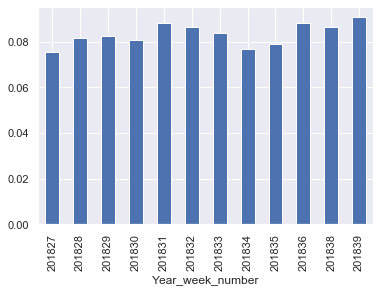

In [18]:
#estimate for week32 

#check for weekly shifts by removing region 4/6

est = pd.pivot_table(data= DF
              ,values=['sales_value']
              ,index=['Year_week_number']
              ,columns=['region_code']
              ,aggfunc=np.sum
              ,fill_value=0)

est.columns = est.columns.droplevel(0)


est.drop([4,5,6],axis=1,inplace=True)

est['Total'] = est.sum(axis=1)

est


est_perc = est.apply(lambda x: round(x/x.sum(),5), axis=0)

est_perc['Total'].plot.bar()


est_perc = est_perc.append(est_perc.sum().rename('Total'))


display(est)
display(est_perc)


del est, est_perc

#0.08661

Year_week_number,Total,Rebased Total,201832
region_code,,,
4,"£69,507","£76,098","£6,591"
5,"£55,695","£60,976","£5,281"
6,"£60,671","£66,424","£5,753"
Estimate,"£185,874","£203,499","£17,625"


,Recorded Sales,Estimate
Year_week_number,,
201827,78211.40,0.00
201828,83461.91,0.00
201829,83860.19,0.00
201830,81994.15,0.00
201831,89772.85,0.00
201832,70099.24,17625.01
201833,83145.91,0.00
201834,77784.74,0.00
201835,80034.18,0.00


,Recorded Sales,Estimate,Total
Year_week_number,,,
201827,£78K,£0K,£78K
201828,£83K,£0K,£83K
201829,£84K,£0K,£84K
201830,£82K,£0K,£82K
201831,£90K,£0K,£90K
201832,£70K,£18K,£88K
201833,£83K,£0K,£83K
201834,£78K,£0K,£78K
201835,£80K,£0K,£80K


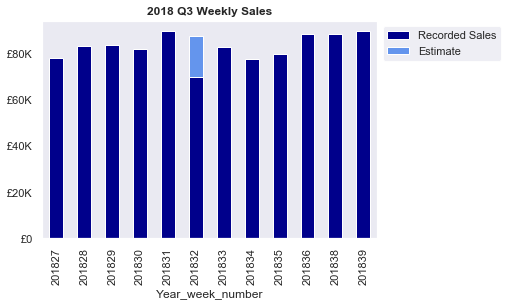

In [19]:
#create estimate column and retotal
est = pd.pivot_table(data= DF
              ,values=['sales_value']
              ,index=['Year_week_number']
              ,columns=['region_code']
              ,aggfunc=np.sum
              ,fill_value=0
                    ,margins=True
                    ,margins_name='Total')

est.columns = est.columns.droplevel(0)


a = est[[4,5,6]].loc['Total':'Total'].T

rebase = 0.08661


a['Rebased Total'] = round(a['Total'] / (1-rebase),2)

a['201832'] = round(a['Rebased Total']*rebase,2)


a = a.append(a.sum().rename('Estimate'))
a = a.applymap("£{0:,.0f}".format)

display(a)

#a=pd.DataFrame(a['201832'].loc['Estimate':'Estimate']).T 

#display(a)



totsales=  pd.DataFrame(DF.groupby(['Year_week_number'])['sales_value'].sum())

totsales.rename( columns={'sales_value':'Recorded Sales'}, inplace=True) #just cols


#couldn't get a join to work 
totsales['Estimate'] = 0.0
totsales.loc[201832:201832,'Estimate':'Estimate']=17625.01
display(totsales)



ax = totsales.plot.bar(stacked=True, legend=True
                       ,color=['darkblue','cornflowerblue'])
ax.grid(False)

yval = ax.get_yticks()
ax.set_yticklabels(['£'+human_format(x) for x in ax.get_yticks()]) 

plt.legend(bbox_to_anchor=(1,1), edgecolor = 'white')
plt.title('2018 Q3 Weekly Sales', weight='bold',  fontsize=12)

#plt.show()
plt.savefig(wd + 'totalsaleswithestimate.png',bbox_inches='tight')

totsales['Total'] = totsales.sum(axis=1)
totsales = totsales.append(totsales.sum().rename('Total'))


totsales_out = totsales.div(1000)
totsales_out = totsales_out.applymap("£{0:.0f}K".format)
display(totsales_out)
del totsales,a




In [88]:
#total customers who placed an order during the qtr



weeksshopped = (DF.groupby(['customer_number'])
            .agg({'Year_week_number': np.count_nonzero})) 

weeksshopped.rename( columns={'Year_week_number':'Orders'}, inplace=True) #just cols

weeksshopped['Num Orders'] = np.where(weeksshopped['Orders']<=9, weeksshopped['Orders'].astype(str),'9+')

display(weeksshopped)


a = pd.DataFrame(weeksshopped.groupby(['Num Orders']).size())

a.rename( columns={0:'Custs'}, inplace=True) #just cols

a['Percentage'] = (a['Custs']/a['Custs'].sum())
a = a.append(a.sum().rename('Total'))

a['Cumlative'] = a['Percentage'].cumsum()    


a['Custs'] = a['Custs'].astype(np.int)
a['Percentage'] = a['Percentage'].apply("{:,.1%}".format)

a['Cumlative'] = a['Cumlative'].apply("{:,.1%}".format)


display(a)

del weeksshopped,a

#so the missing data will be significant here. Is this the same by region

,Orders,Num Orders
customer_number,,
20012,1,1
20029,2,2
20043,1,1
20044,1,1
20106,1,1
...,...,...
199543,1,1
199595,2,2
199704,11,9+


,Custs,Percentage,Cumlative
Num Orders,,,
1,1081,39.5%,39.5%
2,404,14.8%,54.3%
3,259,9.5%,63.8%
4,163,6.0%,69.8%
5,137,5.0%,74.8%
6,98,3.6%,78.3%
7,79,2.9%,81.2%
8,90,3.3%,84.5%
9,81,3.0%,87.5%


In [21]:
#get anyone who only shopped in wk32 and show by region


weeksshopped = (DF.groupby(['customer_number'])
            .agg({'Year_week_number': np.count_nonzero})) 

weeksshopped.rename( columns={'Year_week_number':'Unique Weeks Shopped'}, inplace=True) #just cols

a= weeksshopped[weeksshopped['Unique Weeks Shopped']==1].index
display(a.shape)

b = DF[(DF['customer_number'].isin(a))]#&(DF['Year_week_number']==201832)]

display(b)

c= pd.pivot_table(data= b
              ,values=['customer_number']
              ,index=['Year_week_number']
              ,columns=['region_code']
              ,aggfunc=np.count_nonzero
              ,fill_value=0)



c.columns = c.columns.droplevel(0)

c = c.append(round(c.mean(),0).rename('Average'))
c= c.apply(lambda x: np.round(x,0).astype(np.int))


display(c)

del weeksshopped,a,b,c



(1081,)

,customer_number,delivery_timestamp,Year_week_number,region_code,delivery_saver,sales_value,items,Time,Hour,Hour String,Dayofweek,Delivery Saver
2,82191,2018-05-10 16:00:00,201832,9,0,39.82,23,16:00:00,16,16,3,Not Delivery Saver
6,96903,2018-09-10 15:00:00,201833,10,0,125.19,57,15:00:00,15,15,0,Not Delivery Saver
16,75211,2018-11-15 18:00:00,201838,4,0,88.19,56,18:00:00,18,18,3,Not Delivery Saver
22,197883,2018-09-17 10:00:00,201830,10,0,67.88,49,10:00:00,10,10,0,Not Delivery Saver
24,136324,2018-04-10 16:00:00,201832,1,0,125.77,63,16:00:00,16,16,1,Not Delivery Saver
...,...,...,...,...,...,...,...,...,...,...,...,...
10699,181355,2018-02-10 10:00:00,201832,10,0,108.68,55,10:00:00,10,10,5,Not Delivery Saver
10702,42168,2018-10-26 12:00:00,201835,3,0,48.85,41,12:00:00,12,12,4,Not Delivery Saver
10705,175016,2018-08-30 15:00:00,201827,10,0,225.19,61,15:00:00,15,15,3,Not Delivery Saver
10722,172799,2018-10-30 09:00:00,201836,10,0,62.10,42,09:00:00,9,9,1,Not Delivery Saver


region_code,1,2,3,4,5,6,7,8,9,10,11
Year_week_number,,,,,,,,,,,
201827,5,2,5,8,9,9,3,3,11,25,6
201828,4,4,7,6,7,7,4,5,13,31,7
201829,9,6,10,9,7,6,5,7,7,32,4
201830,8,5,8,7,6,7,8,3,14,40,4
201831,9,4,8,10,4,11,3,7,7,36,2
201832,7,3,11,0,0,0,4,3,14,43,5
201833,6,5,3,9,4,6,6,5,13,27,2
201834,8,3,5,7,7,6,5,6,8,31,0
201835,1,6,5,6,9,2,6,2,7,23,4


In [22]:

weeksshopped = (DF[DF['region_code'].isin([4,5,6])]
                .groupby(['customer_number'])
            .agg({'Year_week_number': pd.Series.nunique})) 

weeksshopped.rename( columns={'Year_week_number':'Unique Weeks Shopped'}, inplace=True) #just cols



a = pd.DataFrame(weeksshopped.groupby(['Unique Weeks Shopped']).size())

a.rename( columns={0:'Custs'}, inplace=True) #just cols


a['Cuml Percentage'] = round(a['Custs']/a['Custs'].sum() ,3)

a = a.append(a.sum().rename('Total'))

display(a)

del weeksshopped,a

,Custs,Cuml Percentage
Unique Weeks Shopped,,
1,222.0,0.402
2,84.0,0.152
3,55.0,0.100
4,38.0,0.069
5,28.0,0.051
6,24.0,0.043
7,22.0,0.040
8,18.0,0.033
9,13.0,0.024


In [23]:

weeksshopped = (DF[~DF['region_code'].isin([4,5,6])]
                .groupby(['customer_number'])
            .agg({'Year_week_number': pd.Series.nunique})) 

weeksshopped.rename( columns={'Year_week_number':'Unique Weeks Shopped'}, inplace=True) #just cols



a = pd.DataFrame(weeksshopped.groupby(['Unique Weeks Shopped']).size())

a.rename( columns={0:'Custs'}, inplace=True) #just cols


a['Cuml Percentage'] = round(a['Custs']/a['Custs'].sum() ,3)

a = a.append(a.sum().rename('Total'))

display(a)

del weeksshopped,a

,Custs,Cuml Percentage
Unique Weeks Shopped,,
1,890.0,0.405
2,322.0,0.147
3,206.0,0.094
4,115.0,0.052
5,116.0,0.053
6,78.0,0.036
7,73.0,0.033
8,68.0,0.031
9,69.0,0.031


In [24]:
#AOV + AIO

 
a = pd.DataFrame(DF.agg({'sales_value':np.mean,'items':np.mean})).T
a.rename(index={0:'Overall'}, inplace=True) #both rows and cols

b= DF.groupby('region_code').agg({'sales_value':np.mean,'items':np.mean})

b = b.append(a)

b = b.round(2)

b.rename( columns={'sales_value':'AOV', 'items':'AIO'}, inplace=True) #just cols

b['AOV'] = b['AOV'].apply("£{0:.2f}".format)


display(b)

del a,b


,AOV,AIO
1,£89.30,58.12
2,£90.82,60.92
3,£85.75,58.61
4,£91.94,56.74
5,£90.71,58.43
6,£88.44,60.13
7,£100.36,66.61
8,£94.55,62.02
9,£89.11,57.14
10,£96.31,60.02


In [90]:
#difference between delivery saver and not

display(DF.groupby('Delivery Saver').agg({'sales_value':[np.mean,np.count_nonzero],'items':np.mean}))

#overall not much


sales_value                    items
                          mean count_nonzero       mean
Delivery Saver                                         
Delivery Saver       95.703010        3239.0  62.128743
Not Delivery Saver   91.429147        7495.0  58.527418

In [78]:
#check how many customers had multiple delivery saver values 



cngprod = (DF.groupby(['customer_number'])
            .agg({'delivery_saver':pd.Series.nunique})) 
cngprod.rename( columns={'delivery_saver':'delsaverprods'}, inplace=True) #just cols

display(cngprod.groupby(['delsaverprods']).size())


cngprod = (list(cngprod[cngprod['delsaverprods']==2].index))
display(cngprod)

del cngprod

delsaverprods
1    2638
2      96
dtype: int64

[24065,
 24869,
 25043,
 25070,
 26961,
 27118,
 27119,
 27283,
 29062,
 29646,
 32628,
 34398,
 38077,
 40239,
 41053,
 41896,
 42003,
 42742,
 43293,
 43495,
 45400,
 45426,
 46154,
 46218,
 46277,
 46492,
 46554,
 46624,
 46721,
 47479,
 47801,
 47933,
 48765,
 50549,
 50643,
 50958,
 51463,
 51610,
 52829,
 59266,
 60931,
 61464,
 61517,
 61614,
 68909,
 76189,
 76199,
 77538,
 82391,
 95753,
 110576,
 111216,
 112432,
 112563,
 123682,
 125883,
 128058,
 128563,
 128744,
 132023,
 133167,
 134650,
 136925,
 139400,
 139846,
 140537,
 141564,
 142914,
 143907,
 150217,
 151018,
 151573,
 152069,
 153375,
 156156,
 156201,
 160278,
 161253,
 161782,
 162813,
 162919,
 163016,
 171263,
 172703,
 173409,
 173914,
 174485,
 175837,
 179373,
 181222,
 184638,
 186687,
 188447,
 191170,
 193194,
 198486]

In [80]:
#order frequency deliver saver should overindex

cngprod = (DF.groupby(['customer_number'])
            .agg({'delivery_saver':pd.Series.nunique})) 
cngprod.rename( columns={'delivery_saver':'delsaverprods'}, inplace=True) #just cols

display(cngprod.groupby(['delsaverprods']).size())

cngprod = (list(cngprod[cngprod['delsaverprods']==2].index))




a = (DF[~DF['customer_number'].isin(cngprod)]
         .groupby(['customer_number'])
            .agg({'Year_week_number': np.count_nonzero
                     ,'delivery_saver':np.max})) 

a.rename( columns={'Year_week_number':'Orders'}, inplace=True) #just cols

a['Num Orders'] = np.where(a['Orders']<=9, a['Orders'].astype(str),'9+')


a.reset_index(level=0, inplace=True)


display(a)

b = pd.pivot_table(a
              ,values=['customer_number']
              ,index=['Num Orders']
              ,columns=['delivery_saver']
              ,aggfunc=np.count_nonzero
              ,fill_value=0)

b.columns = b.columns.droplevel(0)
b.rename( columns={0:'Not Delivery Saver',1:'Delivery Saver'}, inplace=True) #just cols

b = b.append(b.sum().rename('Total'))

b['% Delivery Saver'] = b['Delivery Saver'] / (b['Not Delivery Saver']+b['Delivery Saver'])

b['% Delivery Saver'] = b['% Delivery Saver'].apply("{:,.1%}".format)

b = b.rename_axis(' ', axis='columns')

display(b)

del a,b,cngprod


delsaverprods
1    2638
2      96
dtype: int64

,customer_number,Orders,delivery_saver,Num Orders
0,20012,1,0,1
1,20029,2,0,2
2,20043,1,0,1
3,20044,1,0,1
4,20106,1,0,1
...,...,...,...,...
2633,199543,1,0,1
2634,199595,2,0,2
2635,199704,11,1,9+
2636,199833,1,0,1


,Not Delivery Saver,Delivery Saver,% Delivery Saver
Num Orders,,,
1,1064,17,1.6%
2,391,9,2.2%
3,251,3,1.2%
4,150,7,4.5%
5,123,7,5.4%
6,81,11,12.0%
7,53,17,24.3%
8,62,23,27.1%
9,55,17,23.6%


Delivery Saver,Delivery Saver,Not Delivery Saver,Overall,Delivery Saver %
region_code,,,,
1,257,441,698,0.37
2,118,320,438,0.27
3,278,452,730,0.38
4,254,502,756,0.34
5,185,429,614,0.30
6,259,427,686,0.38
7,132,355,487,0.27
8,248,535,783,0.32
9,287,891,1178,0.24


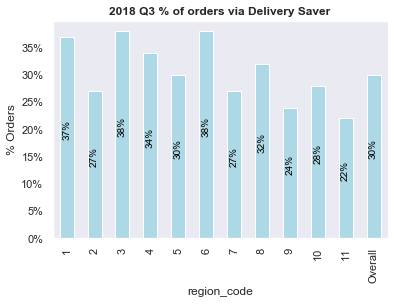

In [89]:
#see if there is a regional shift - this is at order level
a =  pd.pivot_table(data= DF
              ,values=['customer_number']
              ,index=['region_code']
              ,columns=['Delivery Saver']
              ,aggfunc=np.count_nonzero
              ,fill_value=0
              ,margins=True
                ,margins_name = 'Overall')

a.columns = a.columns.droplevel(0)


a['Delivery Saver %'] = round(a['Delivery Saver'] / a['Overall'],2)

display(a)

ax = a['Delivery Saver %'].plot.bar(legend=False,color='lightblue')

xcount = {}    #define dict for loading the heights, works with stacked as well
for i in ax.patches:
    
    if i.get_x() in xcount: #check if the x value is present and either add the height to current val or load
        xcount[i.get_x()] += i.get_height()
    else:
        xcount[i.get_x()] = i.get_height()
    
    if i.get_height() > 0.03:
        ax.text((i.get_x() + i.get_width()/2), #middle of the bar
                (xcount[i.get_x()]) - (i.get_height()/2) , #middle of the bar verically + the height of the bar if using stacked 
                str(int(round((i.get_height()*100),0))) +'%', #the value add text format here
                ha='center' #needed to align label centerally
                ,color = 'black'
                ,fontsize = 10
                ,rotation = 90 #if you want rotataion
                )

yval = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in yval])
ax.set_ylabel('% Orders')            
ax.grid(False)

plt.title('2018 Q3 % of orders via Delivery Saver', weight='bold',  fontsize=12)

plt.savefig(wd + 'deliverysaverperc.png',bbox_inches='tight')

#plt.show()        


del a

Delivery Saver,Delivery Saver,Not Delivery Saver,Overall,Delivery Saver %
Hour,,,,
7,19,31,50,0.38
8,156,288,444,0.35
9,394,529,923,0.43
10,569,917,1486,0.38
11,399,540,939,0.42
12,276,489,765,0.36
13,159,186,345,0.46
14,93,725,818,0.11
15,125,718,843,0.15


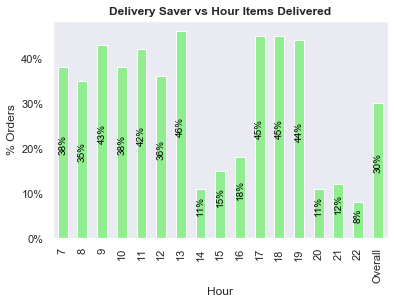

In [93]:
#see if there is a regional shift - this is at order level
a =  pd.pivot_table(data= DF
              ,values=['customer_number']
              ,index=['Hour']
              ,columns=['Delivery Saver']
              ,aggfunc=np.count_nonzero
              ,fill_value=0
              ,margins=True
                ,margins_name = 'Overall')

a.columns = a.columns.droplevel(0)


a['Delivery Saver %'] = round(a['Delivery Saver'] / a['Overall'],2)

display(a)

ax = a['Delivery Saver %'].plot.bar(legend=False,color='lightgreen')

xcount = {}    #define dict for loading the heights, works with stacked as well
for i in ax.patches:
    
    if i.get_x() in xcount: #check if the x value is present and either add the height to current val or load
        xcount[i.get_x()] += i.get_height()
    else:
        xcount[i.get_x()] = i.get_height()
    
    if i.get_height() > 0.03:
        ax.text((i.get_x() + i.get_width()/2), #middle of the bar
                (xcount[i.get_x()]) - (i.get_height()/2) , #middle of the bar verically + the height of the bar if using stacked 
                str(int(round((i.get_height()*100),0))) +'%', #the value add text format here
                ha='center' #needed to align label centerally
                ,color = 'black'
                ,fontsize = 10
                ,rotation = 90 #if you want rotataion
                )

yval = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in yval])
ax.set_ylabel('% Orders')            
ax.grid(False)

plt.title('Delivery Saver vs Hour Items Delivered', weight='bold',  fontsize=12)

plt.savefig(wd + 'houritemsdelivered.png',bbox_inches='tight')

plt.show()        


del a

In [46]:
#try using a tree for multivariate 

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



In [58]:
feature_cols = ['Year_week_number', 'region_code', 'sales_value', 'items','Hour','Dayofweek']

X = DF[feature_cols] # Features
y = DF['delivery_saver'] # Target variable

display(X)
display(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1) #went 50/50

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 5
                           , min_samples_leaf =20
                           ,max_leaf_nodes = 5 )

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)



print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


,Year_week_number,region_code,sales_value,items,Hour,Dayofweek
0,201834,3,75.31,53,11,2
1,201835,8,121.65,69,20,2
2,201832,9,39.82,23,16,3
3,201827,3,97.60,67,9,3
4,201831,3,79.78,42,19,6
...,...,...,...,...,...,...
10729,201831,11,132.82,122,14,5
10730,201828,9,113.39,59,8,0
10731,201831,2,159.50,88,19,2
10732,201832,1,53.32,35,13,1


0        1
1        0
2        0
3        0
4        0
        ..
10729    0
10730    0
10731    0
10732    0
10733    0
Name: delivery_saver, Length: 10734, dtype: int64

Accuracy: 0.6964784795975405


In [59]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

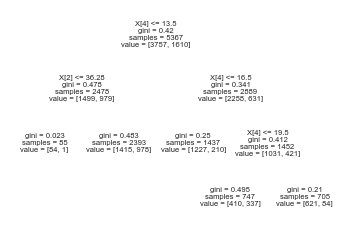

In [60]:
tree.plot_tree(clf)

plt.savefig(wd+'tempimage.png')

In [66]:
import os     

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [70]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
display(graph)
graph.write_png(wd+'t1.png')
#Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
#day of week

aa = 'Delivery Saver'
bb = 'Not Delivery Saver'

a =DF[DF['Delivery Saver']==aa]['Dayofweek']
b= DF[DF['Delivery Saver']==bb]['Dayofweek']

#relative frequency
sns.distplot(a, bins=7, label = aa)
sns.distplot(b, bins=7, label = bb)
plt.legend(prop={'size': 12})
#plt.title('Dist of xx')
plt.xlabel('Day or Week')
plt.ylabel('Relative Frequency')
plt.show()





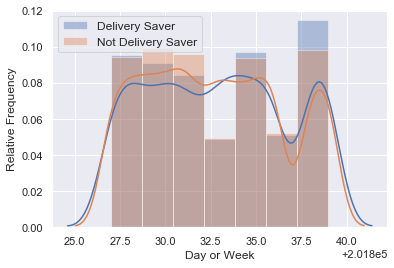

In [29]:
#day of week

aa = 'Delivery Saver'
bb = 'Not Delivery Saver'

a =DF[DF['Delivery Saver']==aa]['Year_week_number']
b= DF[DF['Delivery Saver']==bb]['Year_week_number']

#relative frequency
sns.distplot(a, bins=7, label = aa)
sns.distplot(b, bins=7, label = bb)
plt.legend(prop={'size': 12})
#plt.title('Dist of xx')
plt.xlabel('Day or Week')
plt.ylabel('Relative Frequency')
plt.show()

del a, b,aa,bb



In [33]:


a =  pd.pivot_table(data= DF
              ,values=['customer_number']
              ,index=['Year_week_number']
              ,columns=['Delivery Saver']
              ,aggfunc=np.count_nonzero
              ,fill_value=0
              ,margins=True
                ,margins_name = 'Total')

a.columns = a.columns.droplevel(0)

a['perc'] = a['Delivery Saver'] /a['Total']

display(a)

del a

Delivery Saver,Delivery Saver,Not Delivery Saver,Total,perc
Year_week_number,,,,
201827,253,582,835,0.302994
201828,278,632,910,0.305495
201829,239,635,874,0.273455
201830,266,638,904,0.294248
201831,261,689,950,0.274737
201832,208,548,756,0.275132
201833,272,634,906,0.300221
201834,280,589,869,0.322209
201835,260,618,878,0.296128


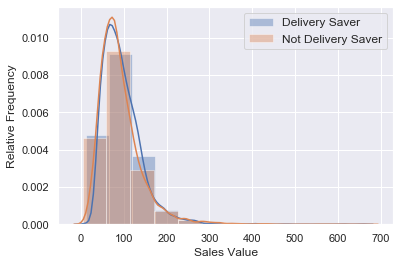

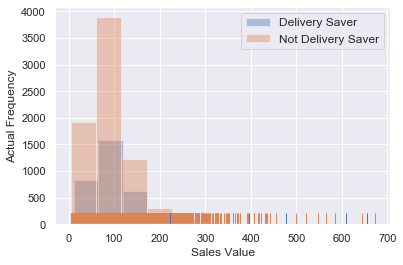

In [280]:
aa = 'Delivery Saver'
bb = 'Not Delivery Saver'

a =DF[DF['Delivery Saver']==aa]['sales_value']
b= DF[DF['Delivery Saver']==bb]['sales_value']

#relative frequency
sns.distplot(a, bins=12, label = aa)
sns.distplot(b, bins=12, label = bb)
plt.legend(prop={'size': 12})
#plt.title('Dist of xx')
plt.xlabel('Sales Value')
plt.ylabel('Relative Frequency')
plt.show()

#actual frequency
sns.distplot(a, bins=12, label = aa, kde=False, rug=True)
sns.distplot(b, bins=12, label = bb, kde=False, rug=True)
plt.legend(prop={'size': 12})
#plt.title('Dist of xx')
plt.xlabel('Sales Value')
plt.ylabel('Actual Frequency')
plt.show()

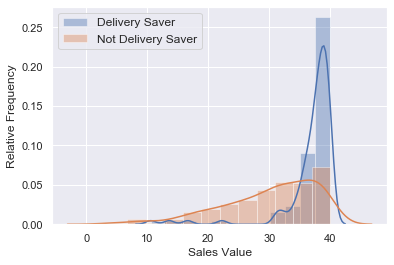

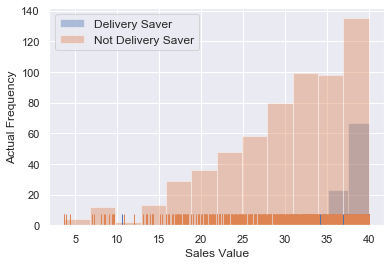

In [249]:
aa = 'Delivery Saver'
bb = 'Not Delivery Saver'

a =DF[(DF['Delivery Saver']==aa)&(DF['sales_value']<=40)]['sales_value']
b= DF[(DF['Delivery Saver']==bb)&(DF['sales_value']<=40)]['sales_value']

#relative frequency
sns.distplot(a, bins=12, label = aa)
sns.distplot(b, bins=12, label = bb)
plt.legend(prop={'size': 12})
#plt.title('Dist of xx')
plt.xlabel('Sales Value')
plt.ylabel('Relative Frequency')
plt.show()

#actual frequency
sns.distplot(a, bins=12, label = aa, kde=False, rug=True)
sns.distplot(b, bins=12, label = bb, kde=False, rug=True)
plt.legend(prop={'size': 12})
#plt.title('Dist of xx')
plt.xlabel('Sales Value')
plt.ylabel('Actual Frequency')
plt.show()

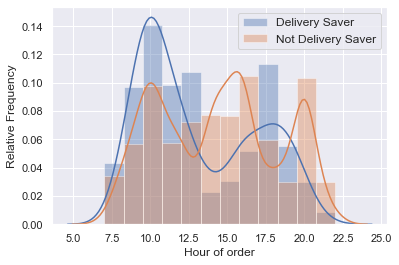

In [250]:
aa = 'Delivery Saver'
bb = 'Not Delivery Saver'

a =DF[DF['Delivery Saver']==aa]['Hour']
b= DF[DF['Delivery Saver']==bb]['Hour']

#relative frequency
sns.distplot(a, bins=12, label = aa)
sns.distplot(b, bins=12, label = bb)
plt.legend(prop={'size': 12})
#plt.title('Dist of xx')
plt.xlabel('Hour of order')
plt.ylabel('Relative Frequency')
plt.show()


In [14]:
#junk below this 